In [120]:
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
#import seaborn as sns
import sklearn
import numpy as np

In [60]:
# Import data
co2_df = pd.read_csv('input/global_co2.csv')
temp_df = pd.read_csv('input/annual_temp.csv')
print(co2_df.head())
print(temp_df.head())
#print(co2_df.columns=['Year','CO2'])

   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
    Source  Year    Mean
0     GCAG  2015  0.8990
1  GISTEMP  2015  0.8700
2     GCAG  2014  0.7402
3  GISTEMP  2014  0.7500
4     GCAG  2013  0.6687


In [61]:
# Clean data
co2_df = co2_df.ix[:,:2]                     # Keep only total CO2
co2_df = co2_df.ix[co2_df['Year'] >= 1960]   # Keep only 1960 - 2010
co2_df.columns=['Year','CO2']                # Rename columns
co2_df = co2_df.reset_index(drop=True)                # Reset index
print(co2_df.tail())


    Year   CO2
46  2006  8370
47  2007  8566
48  2008  8783
49  2009  8740
50  2010  9167


In [62]:
temp_df =temp_df[temp_df.Source != 'GISTEMP'] # Keep only one source 
temp_df.drop('Source', inplace = True, axis = 1) #Drop name of source
temp_df = temp_df.reindex(index=temp_df.index[::-1]) #Reset Index


In [63]:
temp_df = temp_df.ix[temp_df['Year'] >= 1960]   # Keep only 1960 - 2010
temp_df.columns=['Year', 'Temperature']# Rename columns
temp_df = temp_df.reset_index(drop=True)     
print(temp_df.tail())

    Year  Temperature
51  2011       0.5759
52  2012       0.6219
53  2013       0.6687
54  2014       0.7402
55  2015       0.8990


In [69]:
# Concatenate
climate_change_df = pd.concat([co2_df, temp_df.Temperature], axis=1)
print(climate_change_df.head())

     Year     CO2  Temperature
0  1960.0  2569.0       0.0252
1  1961.0  2580.0       0.0818
2  1962.0  2686.0       0.0924
3  1963.0  2833.0       0.1100
4  1964.0  2995.0      -0.1461


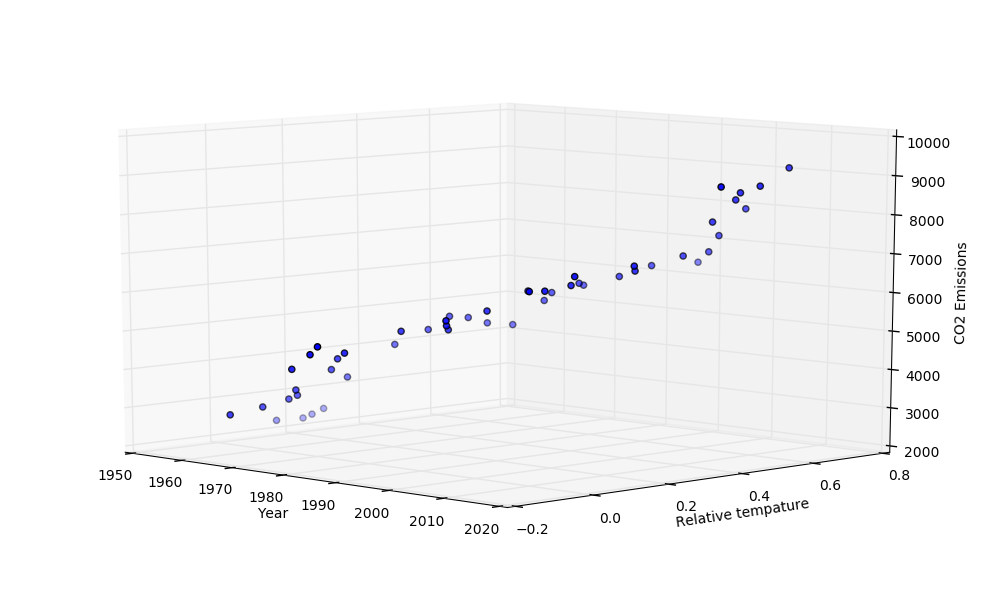

In [65]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5,7.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(climate_change_df['Year'], climate_change_df['Temperature'] , climate_change_df['CO2'])
ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)

### Projected 2D plots

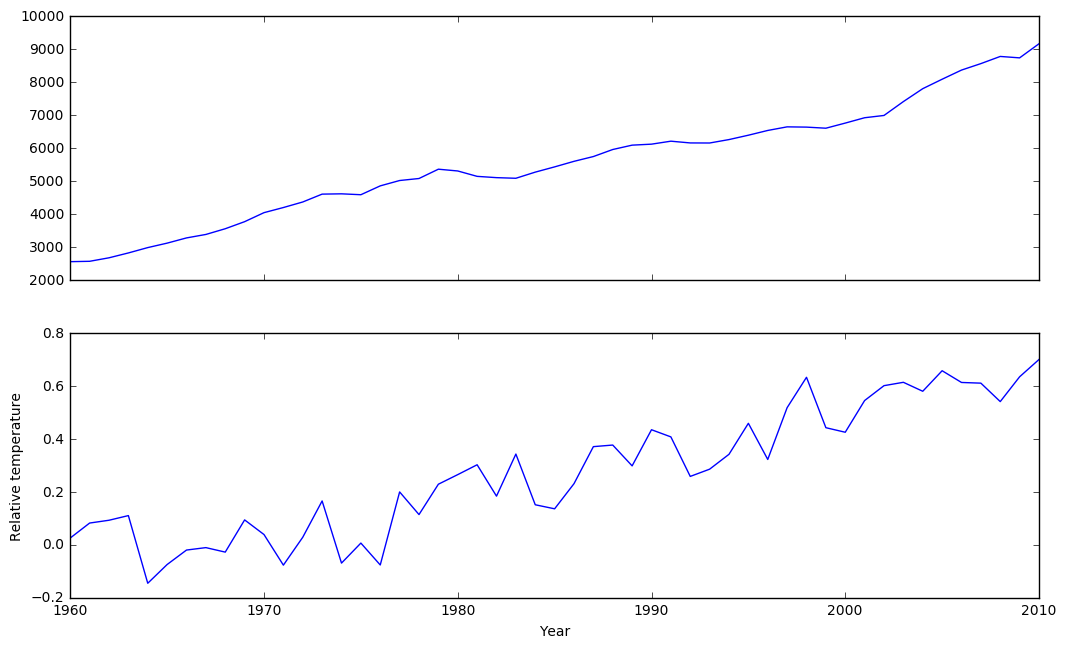

In [66]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5,7.5)
#help(plt.subplots)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')


### 3. Linear Regression

In [147]:
from sklearn.model_selection import train_test_split

climate_change_df = climate_change_df.dropna()

X = climate_change_df.as_matrix(['Year'])
Y = climate_change_df.as_matrix(['CO2', 'Temperature']).astype('float32')

indexes = ~np.isnan(X)
X_train, X_test, Y_train, Y_test = np.asarray(train_test_split(X,Y, test_size=0.1)) 
#print(X_train)

In [164]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y_train)
print('Score: ', reg.score(X_test.reshape(-1, 1), Y_test))

ValueError: total size of new array must be unchanged

### 4. Plot regression and visualize results

In [154]:
x_line = np.arange(1960,2011).reshape(-1,1)
p = reg.predict(x_line).T
print(x_line)

[[1960]
 [1961]
 [1962]
 [1963]
 [1964]
 [1965]
 [1966]
 [1967]
 [1968]
 [1969]
 [1970]
 [1971]
 [1972]
 [1973]
 [1974]
 [1975]
 [1976]
 [1977]
 [1978]
 [1979]
 [1980]
 [1981]
 [1982]
 [1983]
 [1984]
 [1985]
 [1986]
 [1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]]


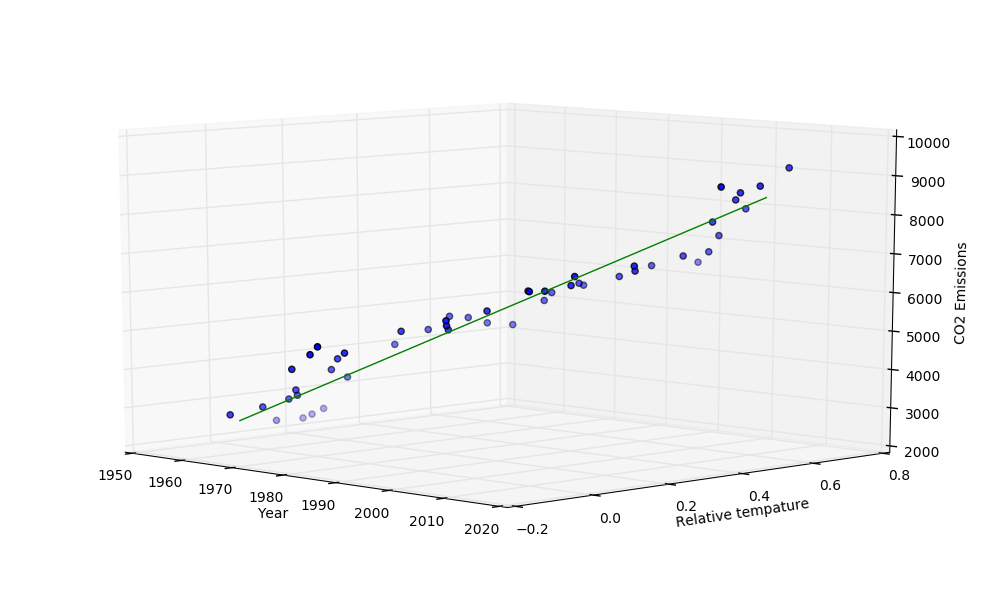

In [152]:

fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])
ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.plot(x_line, p[1], p[0], color='g')
ax.view_init(10, -45)

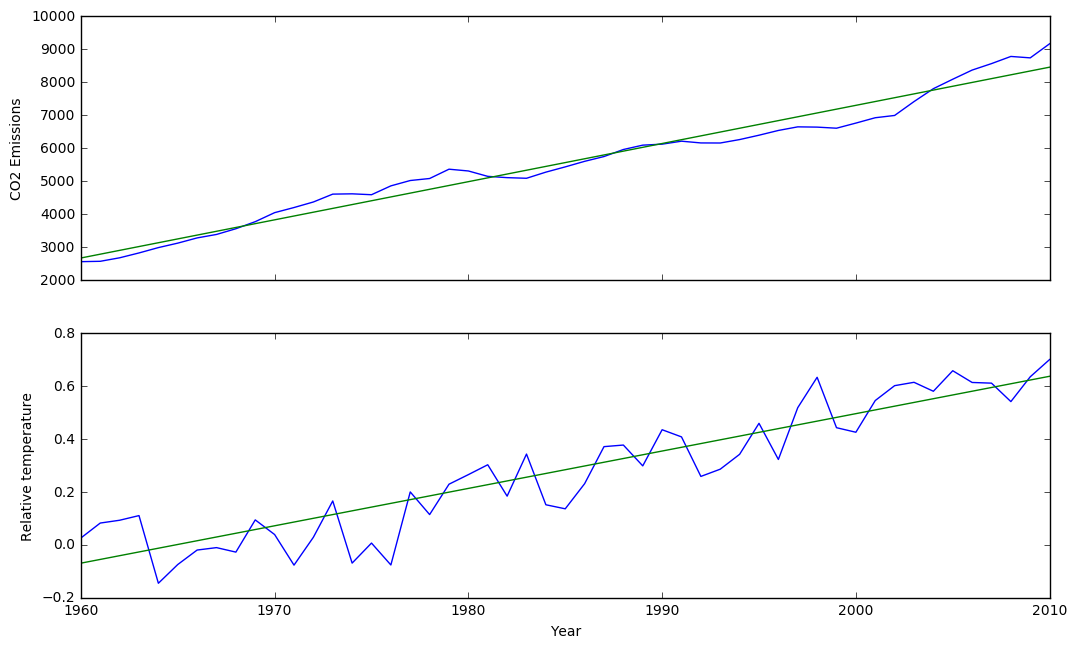

In [153]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].plot(x_line, p[0])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].plot(x_line, p[1])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')